In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [6]:
FILEPATH='data/block_2010_data/nhgis0005_csv'
relevant_cols = ['GISJOIN', 'STATEA', 'COUNTYA', 'H7X001', 'H7X002', 'H7X003', 'H7X004', 
                               'H7X005', 'H7X006', 'H7X007', 'H7X008']
race_raw = pd.read_csv(f'{FILEPATH}/nhgis0005_ds172_2010_block.csv', 
                       usecols=relevant_cols, 
                       dtype={'GISJOIN': str, 'STATEA': str, 'COUNTYA': str})
column_mapper = dict(zip(relevant_cols, ['GISJOIN', 'state_fips', 'county_fips', 'total', 'white',
                                        'black', 'american_indian_al_native', 'asian', 
                                        'hawaiian_pac_islander', 'other', 'two_plus']))
race_raw.rename(columns=column_mapper, inplace=True)
print("Race data loaded.")
race_raw.set_index('GISJOIN', inplace=True)
race_raw

Race data loaded.


,state_fips,county_fips,total,white,black,american_indian_al_native,asian,hawaiian_pac_islander,other,two_plus
GISJOIN,,,,,,,,,,
G06000104001001000,06,001,0,0,0,0,0,0,0,0
G06000104001001001,06,001,0,0,0,0,0,0,0,0
G06000104001001002,06,001,0,0,0,0,0,0,0,0
G06000104001001003,06,001,0,0,0,0,0,0,0,0
G06000104001001004,06,001,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
G42013300240022033,42,133,19,18,0,0,0,0,0,1
G42013300240022034,42,133,48,48,0,0,0,0,0,0
G42013300240022035,42,133,16,16,0,0,0,0,0,0


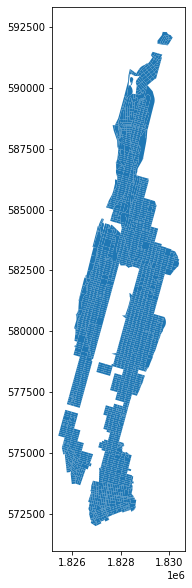

In [7]:
manhattan_blocks = gpd.read_file(
    'data/block_2010_data/nhgis0005_shape/nhgis0005_shapefile_tl2010_360_block_2010/NY_block_2010.shp').set_index('GEOID10')
manhattan_rl_cw = pd.read_csv('data/outputs/Manhattan_blocks_2010_crosswalk.csv', dtype={'block_id_2010': str}).set_index('block_id_2010')
manhattan_blocks = manhattan_blocks.join(manhattan_rl_cw, how='outer').dropna().set_index('GISJOIN')
manhattan_blocks.plot(figsize=(10,10))

In [8]:
manhattan = manhattan_blocks.join(race_raw, how='outer').dropna()

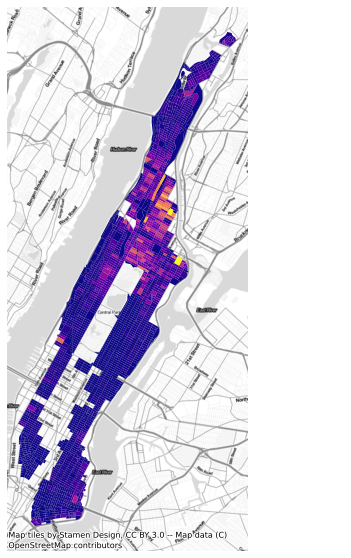

In [9]:
import contextily as ctx
def plot_map(df, column, figsize=(10,10), cmap='plasma'):
    ax = df.to_crs(epsg=3857).plot(figsize=figsize, cmap=cmap, column=column)
    ax.set_axis_off()
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

plot_map(manhattan, 'black')

In [10]:
R = manhattan.groupby('holc_id_uq').sum().filter(['total', 'white', 'black', \
    'american_indian_al_native', 'asian', 'hawaiian_pac_islander', \
    'hawaiian_pac_islander', 'other', 'two_plus'])

In [11]:
R

,total,white,black,american_indian_al_native,asian,hawaiian_pac_islander,hawaiian_pac_islander,other,two_plus
holc_id_uq,,,,,,,,,
A0,12150,11183,102,8,630,0,0,55,172
A1,3232,2482,150,5,476,3,3,50,66
A2,8932,8141,142,8,401,0,0,122,118
A3,6321,5796,46,6,338,4,4,42,89
A4,6568,5953,122,4,315,2,2,45,127
A5,18058,16838,130,10,743,2,2,88,247
A6,14317,13220,154,5,638,0,0,61,239
A7,14323,10839,905,45,664,5,5,1241,624
B10,52622,19581,5754,757,1410,33,33,21124,3963


In [12]:
def city_entropy(R, P):
    """
    Computes entropy of a city-region (see White, 1986).

    Parameters
    ----------
    R : numpy.ndarray
        i-by-j matrix, where i=districts and j=ethnicities.
    P : numpy.array
        i-length vector of the total population in a city-region.
    
    Returns
    -------
    int
        citywide segregation entropy score.
    """
    # define key terms in algorithm
    N = sum(P)
    i, j = R.shape
    R_prop = np.nan_to_num(np.apply_along_axis(lambda column: column / P, 0, R))
    r_hat = R.sum(axis=0) / N

    
    def entropy(x):
        """compute an entropy score with region ethnicity proportion vector x."""
        with np.errstate(divide='ignore'):
            vec = np.log(x)
        vec[np.isneginf(vec)] = 0 # fix special case where 0 * ln(0) = 0
        return (-1) * sum(x*vec)
    
    # compute district-level entropy scores
    h_i = list(map(entropy, R_prop))

    # compute city-wide entropy
    H_hat = entropy(r_hat)
    H_bar = sum((P/N) * h_i)
    
    return (H_hat - H_bar) / H_hat


In [13]:
def chain_to_entropy(chainobj, blocks):
    """
    Takes element in Markov Chain and computes entropy score using the partition map.
    Parameters
    ----------
    chainobj : gerrychain.partition.partition.Partition
        Partition object that dictates which elements belong to which partitions.
    blocks : geopandas.GeoDataFrame
        Dataframe containing the map's census blocks and associated race information.
    
    Returns
    -------
    int
        entropy score using the partition data from Markov Chain element.
    """
    # use partition parts and grouping to create R and P
    R = blocks.drop(columns=['geometry']).copy()
    R['partition'] = blocks.index.map(dict(chainobj.assignment))
    R = R.groupby('partition').sum()
    R, P = R.to_numpy()[:, 1:], R.to_numpy()[:, 0]

    return city_entropy(R, P)

In [14]:
race_matrix = manhattan.filter(['total', 'white', 'black', 'american_indian_al_native', 'asian', 'hawaiian_pac_islander', 'other', 'two_plus', 'holc_id_uq', 'geometry'])
race_matrix.rename(columns={'holc_id_uq': 'partition'}, inplace=True)
race_matrix

,total,white,black,american_indian_al_native,asian,hawaiian_pac_islander,other,two_plus,partition,geometry
GISJOIN,,,,,,,,,,
G36006100002011000,988,164,37,3,721,1,43,19,D26,"POLYGON ((1827981.770 572834.920, 1827826.754 ..."
G36006100002011001,0,0,0,0,0,0,0,0,D26,"POLYGON ((1828004.567 572758.712, 1827856.742 ..."
G36006100002012000,1344,426,263,12,301,1,281,60,D26,"POLYGON ((1828031.965 572681.977, 1828056.220 ..."
G36006100002021000,0,0,0,0,0,0,0,0,D26,"POLYGON ((1828397.094 572954.307, 1828457.317 ..."
G36006100002021001,297,82,52,1,80,0,71,11,D26,"POLYGON ((1828335.190 572891.600, 1828301.005 ..."
...,...,...,...,...,...,...,...,...,...,...
G36006100311001007,0,0,0,0,0,0,0,0,C25,"POLYGON ((1829010.931 588293.271, 1829056.631 ..."
G36006100311001008,0,0,0,0,0,0,0,0,C25,"POLYGON ((1828953.166 588248.655, 1828964.650 ..."
G36006100311001009,2,2,0,0,0,0,0,0,C25,"POLYGON ((1829018.252 588234.702, 1829032.477 ..."


In [15]:
def compute_total_pop(partition):
    global race_matrix
    R = race_matrix.drop(columns=['geometry']).copy()
    R['partition'] = race_matrix.index.map(dict(partition.assignment))
    return R.groupby('partition').sum()['total'].to_dict()

In [16]:
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain, proposals, updaters, constraints, accept)
from gerrychain.updaters import Tally
from gerrychain.proposals import recom, propose_chunk_flip, propose_random_flip
from gerrychain.constraints import districts_within_tolerance, no_vanishing_districts, WithinPercentRangeOfBounds
from gerrychain.accept import always_accept
from functools import partial
from tqdm.notebook import tqdm
import networkx as nx

graph = Graph.from_geodataframe(race_matrix, adjacency='queen')

(1825186.3693414126, 1830651.5791060997, 570993.4610553378, 593304.4292983261)

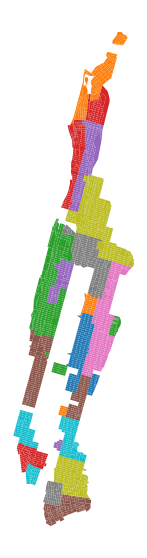

In [17]:
nx.set_node_attributes(graph, race_matrix['total'].to_dict(), name='population')
init_partition = Partition(graph, 
                    assignment=race_matrix.to_dict()['partition'],
                    updaters={'population' : Tally('population')})
init_partition.plot(figsize=(10,10))
plt.axis('off')

3232

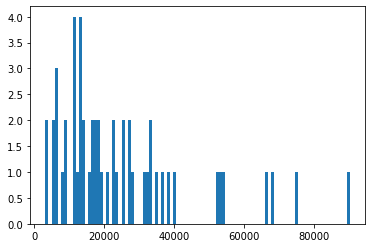

In [18]:
import seaborn as sns
plt.hist(list(init_partition['population'].values()), bins=100)
np.percentile(list(init_partition['population'].values()), [2.5, 97.5])
min(list(init_partition['population'].values()))

In [19]:
ideal_population = sum(compute_total_pop(init_partition).values()) / len(init_partition)
from gerrychain.constraints import Validator, LowerBound
mean_pop = lambda part: np.mean(list(part['population'].values()))
min_pop = lambda part: min(list(part['population'].values()))
is_valid = Validator([WithinPercentRangeOfBounds(mean_pop, 25), LowerBound(min_pop, 3200)])
BURN_IN = 1000
STEP_COUNT = 100000 + BURN_IN
proposal = partial(recom, 
                    pop_col='population', 
                    pop_target=ideal_population,
                    epsilon=100,
                    node_repeats=20000000)
chain = MarkovChain(proposal=propose_chunk_flip, 
                    constraints=is_valid,
                    accept=always_accept, 
                    initial_state=init_partition, 
                    total_steps=STEP_COUNT)
print('Prereqs created, chain running...')
# burn-in of 1000
iter(chain)
print("Burn-in:")
_ = [next(chain) for i in tqdm(range(BURN_IN))]
entropies = [chain_to_entropy(next(chain), race_matrix) for i in tqdm(range(STEP_COUNT - BURN_IN))]
chain = None
np.save("results/arrays/manhattan_cf_100000.npy", entropies)

Prereqs created, chain running...
Burn-in:


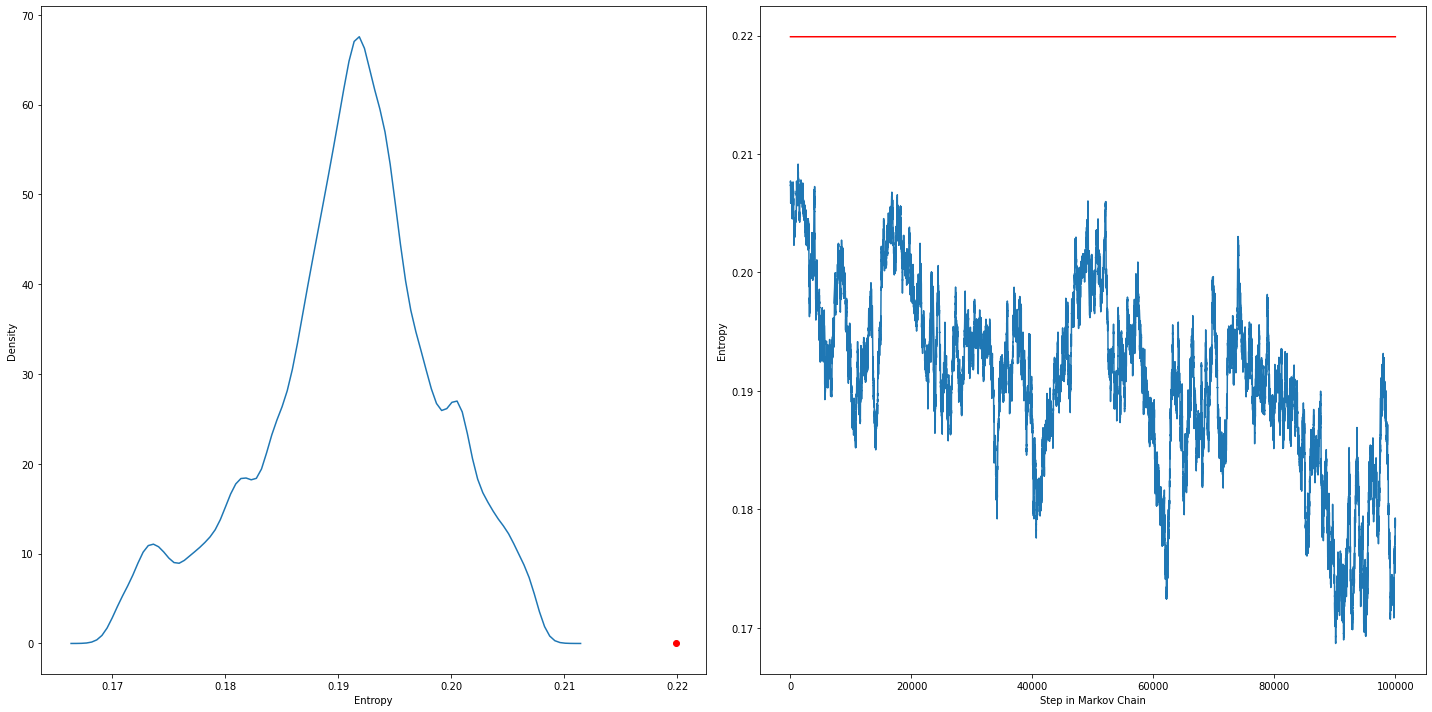

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.xlabel("Entropy")
plt.ylabel("Density")
sns.kdeplot(entropies)
plt.scatter(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), 0, c='r')

plt.subplot(1, 2, 2)
plt.xlabel("Step in Markov Chain")
plt.ylabel("Entropy")
plt.plot(np.arange(STEP_COUNT - 1000), entropies)
plt.plot(np.arange(STEP_COUNT - 1000), np.repeat(city_entropy(R.to_numpy()[:, 1:], R.to_numpy()[:, 0]), STEP_COUNT - 1000), c='r')

plt.tight_layout()
plt.savefig("results/plots/manhattan_cf_100000.png")